In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class image_Seg():
    def __init__(self, img_path, algorithm, region_size, ruler, max_iter, min_element_size):
        self.img_path = img_path
        self.algo = algorithm
        self.region_size = region_size
        self.ruler = ruler
        self.max_iter = max_iter
        self.min_element_size = min_element_size
        
        self.image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        self.SLIC()
        
    def SLIC(self):
        slic = cv2.ximgproc.createSuperpixelSLIC(self.image, algorithm = self.algo, region_size = self.region_size, ruler = self.ruler) 
        slic.iterate(self.max_iter)
        slic.enforceLabelConnectivity(self.min_element_size)
        
        self.label = slic.getLabels()
        self.num_label = slic.getNumberOfSuperpixels()

    def heuristic_clf(self):
        gums = (np.zeros((self.image).shape)).astype(np.uint8)
        teeth = (np.zeros((self.image).shape)).astype(np.uint8)
        others = (np.zeros((self.image).shape)).astype(np.uint8)

        for i in range(self.num_label):
            label_mask = (np.where(self.label==i,1,0)).astype(np.uint8)

            blue, green, red = cv2.split(self.image)
            blue_masked = blue*label_mask
            green_masked = green*label_mask
            red_masked = red*label_mask

            image_masked = cv2.merge([blue_masked, green_masked, red_masked])
            rm,gm,bm,_ = cv2.mean(image_masked, mask=label_mask)
            
            ## decision_creteria
            if (rm - max(gm,bm) > 64) and (max(gm,bm) < 128):
                gums += image_masked  
            elif (rm - max(gm,bm) < 48) and (max(gm,bm) > 128):
                teeth += image_masked
            else:
                others += image_masked
        
        return gums, teeth, others

In [7]:
def draw_and_save(image_mat):
    plt.imshow(image_mat)
    plt.show()
    #save
    plt.close()

In [8]:
"""
cv::ximgproc::SLIC = 100,
cv::ximgproc::SLICO = 101,
cv::ximgproc::MSLIC = 102 
"""
src_path = "fakepath/"

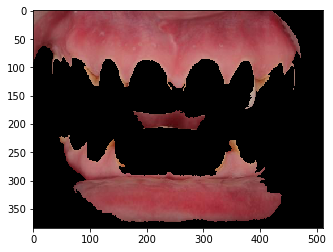

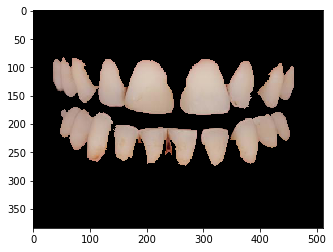

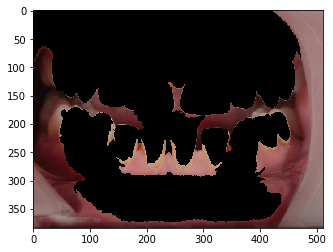

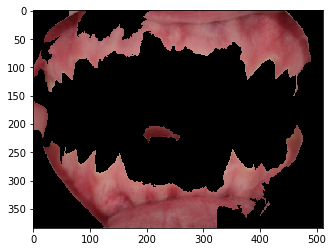

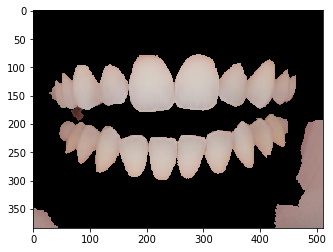

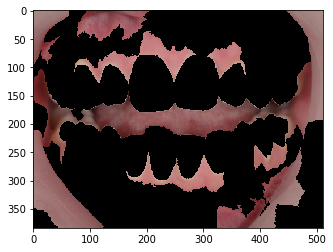

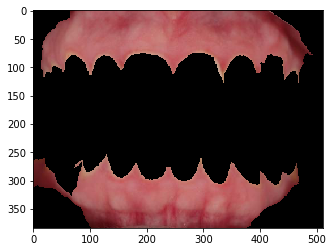

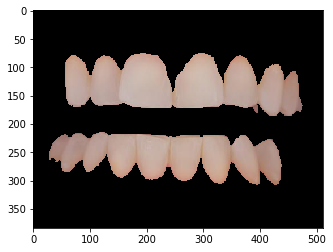

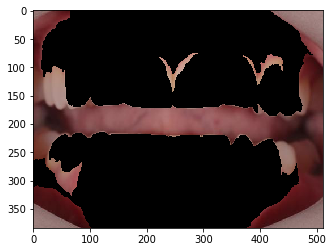

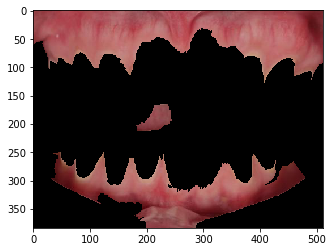

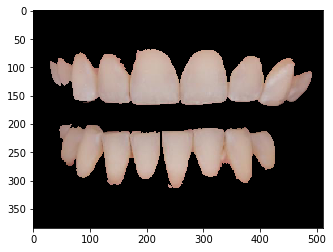

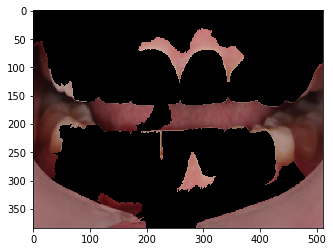

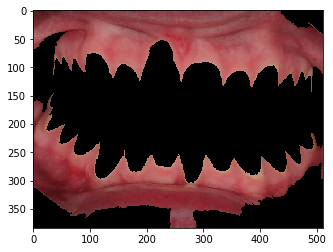

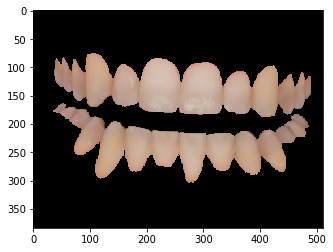

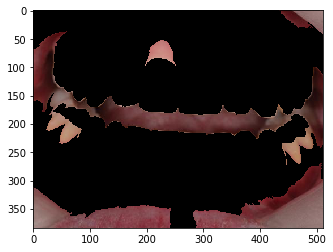

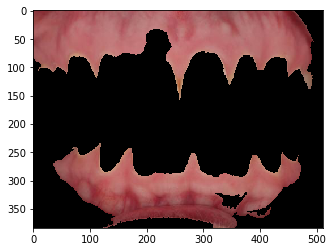

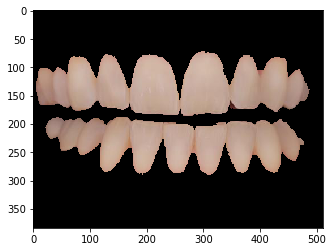

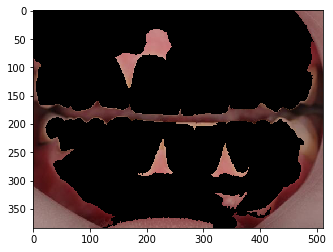

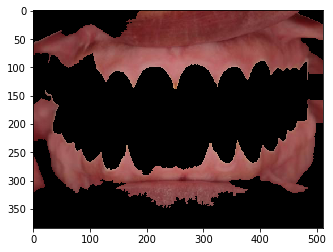

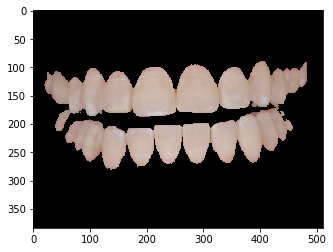

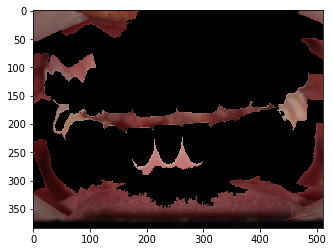

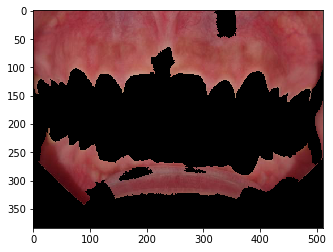

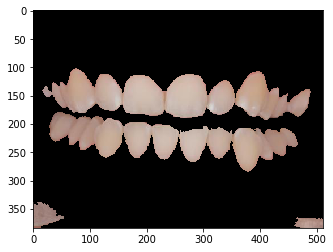

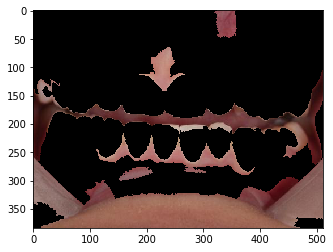

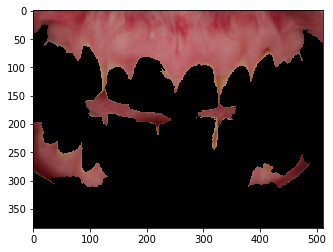

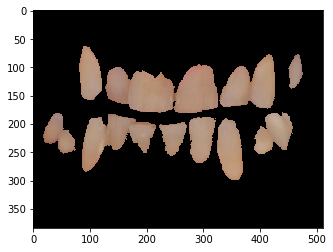

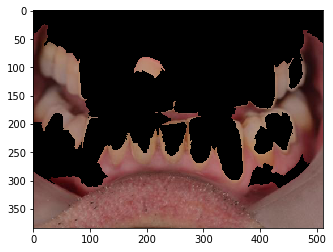

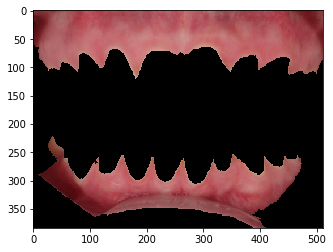

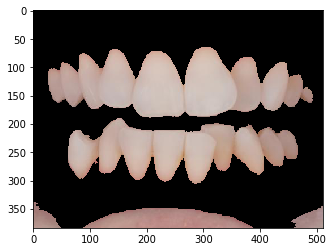

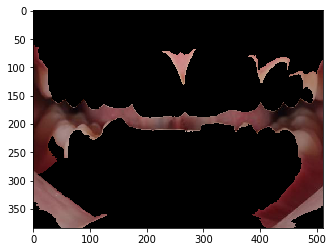

In [9]:
for _, _, files in os.walk(src_path):
    files.sort()
    for name in files:
        img_path = src_path + name
        Seg = image_Seg(img_path, algorithm=100, region_size=40, ruler=40.0, max_iter=10, min_element_size=40)
        gums, teeth, others = Seg.heuristic_clf()
        draw_and_save(gums)
        draw_and_save(teeth)
        draw_and_save(others)